Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)

In [20]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#aplicando conversão básica
#numpy
img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
#B, G, R = cv2.split(img)
#img_grayscale_basic = (B+G+R)/3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
#aplicando conversão ponderada
#img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2.imshow('img_grayscale_basic', img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
img_grayscale_pondered.shape

(250, 500)

## Histograma de uma imagem

In [24]:
histogram = np.zeros(256)
for i in range(img_grayscale_pondered.shape[0]):
    for j in range(img_grayscale_pondered.shape[1]):
        histogram[img_grayscale_pondered[i,j]] += 1

print(histogram[100])

269.0


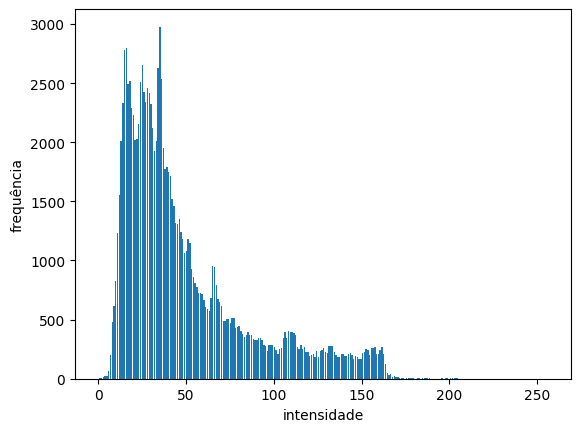

In [25]:
x = np.linspace(0,256,256)
plt.bar(x,histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

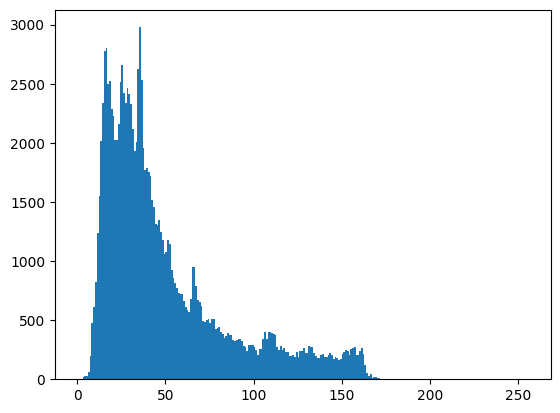

In [26]:
plt.hist(img_grayscale_pondered.ravel(),256,[0,256])
plt.show()

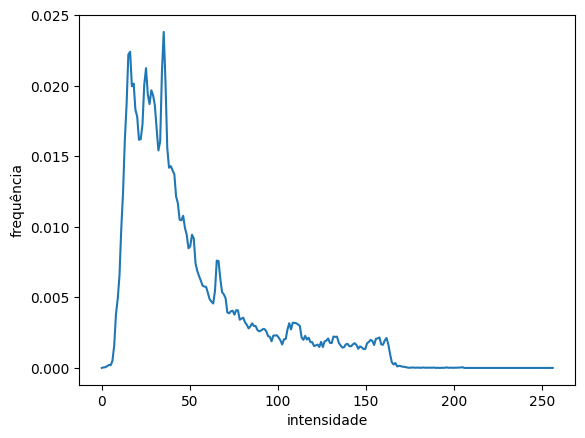

In [27]:
histogram_normalized = histogram/(img_grayscale_pondered.shape[0]*img_grayscale_pondered.shape[1])

x = np.linspace(0,256,256)
plt.plot(x,histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

In [28]:
#negativo

#img_negative[ : , : ,0] = 255 - img[ : , : ,0]
#img_negative[ : , : ,1] = 255 - img[ : , : ,1]
#img_negative[ : , : ,2] = 255 - img[ : , : ,2]
img_in = cv2.imread('data/Fig0304(a)(breast_digital_Xray).tif',1)

img_out = 255 - img_in

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
#logaritimica 
img_in = cv2.imread('data/Fig0305(a)(DFT_no_log).tif',1)

c = 1 # 255/(np.log(1 + np.max(img_in)))
img_out = np.array((c * np.log(1 + img_in + 0.00001)), dtype=np.float32)


print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

5.4380794


In [36]:
#gamma 
img_in = cv2.imread('data/Fig0308(a)(fractured_spine).tif',0)

c = 1 # 255/(np.log(1 + np.max(img_in)))
gamma = 0.6
#img_out = np.array(c*255**(img_in/255) ** gamma, dtype = np.uint8)
img_out = np.array(c*255*(img_in/255)**gamma, dtype = np.uint8)

print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

255


In [31]:
#alargamento de contraste
img_in = cv2.imread('data/Fig0310(b)(washed_out_pollen_image).tif',0)

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] <= 85:
            img_out[i,j] = img_in[i,j]/2
        if img_in[i,j] > 85 or img_in[i,j] < 170:
            img_out[i,j] = 2*img_in[i,j] - 127
        if img_in[i,j] >= 170:
            img_out[i,j] = img_in[i,j]/2 + 128
            
img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
#contraste e brilho
img_in = cv2.imread('data/t1.jpg',0)
a = 1
b = 50

img_out = a*img_in + b

img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
#limiar
img_in = cv2.imread('data/t1.jpg',0)

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] < 127 :
            img_out[i,j] = 0
        else:
            img_out[i,j] = 255 #img_in[i,j]

img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('data/Fig0312(a)(kidney).tif',0)

a = 50
b = 150

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] <= a or img_in[i,j] >= b:
            img_out[i,j] = 255
        if img_in[i,j] > a and img_in[i,j] < b:
            img_out[i,j] = img_in[i,j]
            
img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()